In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [9]:
df = pd.read_csv('/Users/deeptilalwani/Documents/Data Science/ASSIGNMENTS/10/book.csv',encoding='latin-1')

In [10]:
df.shape

(10000, 4)

#  Preprocess the data 

In [14]:
df.rename(columns={'Unnamed: 0':'ID'}, inplace=True )
df.rename(columns={'Book.Title':'Title'}, inplace = True)
df.rename(columns={'User.ID':'User ID'}, inplace = True)
df.rename(columns={'Book.Rating':'Rating'}, inplace = True)

In [15]:
df = df.drop_duplicates(subset=['Title', 'User ID'], keep='first')

In [16]:
df.head()

,ID,User ID,Title,Rating
0,1,276726,Classical Mythology,5
1,2,276729,Clara Callan,3
2,3,276729,Decision in Normandy,6
3,4,276736,Flu: The Story of the Great Influenza Pandemic...,8
4,5,276737,The Mummies of Urumchi,6


In [17]:
df.shape

(9993, 4)

In [19]:
num_ratings = df['Rating'].count()
num_users = df['User ID'].nunique()
num_books = df['Title'].nunique()

pd.DataFrame([['# of Ratings', num_ratings],
            ['# of Users', num_users],
            ['# of Books', num_books]],
            columns = ['Characteristic', 'Count'])

,Characteristic,Count
0,# of Ratings,9993
1,# of Users,2182
2,# of Books,9659


##### There are 9993 rows and 4 columns out of which Rating Count is 9993, Unique Users 2182 & Unique Book title is 9659

In [20]:
df.describe()

,ID,User ID,Rating
count,9993.000000,9993.000000,9993.000000
mean,5000.180226,95342.799860,7.566797
std,2887.196649,117652.347377,1.820884
min,1.000000,8.000000,1.000000
25%,2500.000000,2103.000000,7.000000
50%,5000.000000,3757.000000,8.000000
75%,7501.000000,162052.000000,9.000000
max,10000.000000,278854.000000,10.000000


In [22]:
df['Rating'].describe()

count    9993.000000
mean        7.566797
std         1.820884
min         1.000000
25%         7.000000
50%         8.000000
75%         9.000000
max        10.000000
Name: Rating, dtype: float64

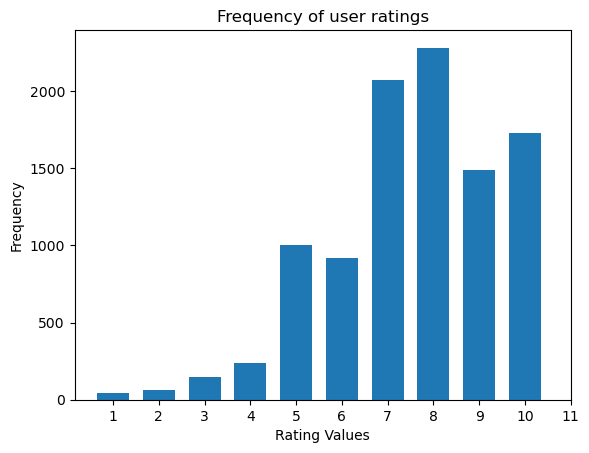

In [25]:
data = df['Rating']
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

plt.hist(data, bins, align="left", rwidth = 0.7)
plt.xticks(bins)
plt.xlabel('Rating Values')
plt.ylabel('Frequency')
plt.title('Frequency of user ratings')
plt.show()

##### As we see, most users provided pretty positive ratings on books, with the most frequent rating being 8 and average was 7.5

In [27]:
#Vectorize the text data
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(df['Title'])

# Calculate cosine similarity scores

In [28]:
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


In [54]:
# Shape of the cosine similarity matrix
num_books = cosine_sim.shape[0]
print("Number of books:", num_books)
print("Shape of cosine similarity matrix:", cosine_sim.shape)

Number of books: 9993
Shape of cosine similarity matrix: (9993, 9993)


In [55]:
# Range of scores and interpretation
min_score = cosine_sim.min()
max_score = cosine_sim.max()
print("Range of scores:", min_score, "to", max_score)


Range of scores: 0.0 to 1.0000000000000007


In [56]:
# Interpretation of scores
# Scores close to 1 indicate high similarity between books
# Scores close to 0 indicate low similarity between books
# Scores close to -1 indicate dissimilarity between books

##### The range includes the lower bound of 0.0, indicating that there are pairs of books with no textual overlap or similarity
#####  The maximum value of 1.0000000000000007 suggests that there is a pair of books in dataset that have an exact or near-exact match in terms of their textual representation

In [59]:
# Insights about the sparse nature of cosine similarity matrix
nonzero_elements = np.count_nonzero(cosine_sim)
total_elements = cosine_sim.shape[0] * cosine_sim.shape[1]
sparsity = 1 - (nonzero_elements / total_elements)
print("Sparsity of cosine similarity matrix: {:.2%}".format(sparsity))


Sparsity of cosine similarity matrix: 98.63%


##### The sparsity of 98.63% indicates that only a small portion of the cosine similarity matrix contains non-zero values. 
##### Since most elements are zeros, a non-zero score indicates a potential similarity relationship between the corresponding books.

# Select Target book based on "User Input"

In [31]:
target_book = 'The Catcher in the Rye' 
# Example target book title

In [34]:
#Find most similar books
book_indices = df[df['Title'] == target_book].index
book_scores = list(enumerate(cosine_sim[book_indices[0]]))
book_scores = sorted(book_scores, key=lambda x: x[1], reverse=True)

In [36]:
#Present recommendations
top_n = 5  # Number of recommendations to display
recommended_books_indices = [i[0] for i in book_scores[1:top_n+1]]
recommended_books = df.iloc[recommended_books_indices]['Title']

In [37]:
print("Recommended books:")
for book in recommended_books:
    print(book)

Recommended books:
The Catcher in the Rye
Ham on Rye
Catcher in the Wry
Spy Catcher: The Candid Autobiography of a Senior Intelligence Officer
Classical Mythology


# Select Target book based on "Popular Books Approach" 

#### In this code, we select the target book based on the popular books approach. The target book is chosen as the most popular book from the dataset, based on the count of occurrences in the "book title" column.

In [51]:
# Popular books approach: Choose the most popular book from the dataset
popular_books = df['Title'].value_counts().index
target_book = popular_books[0]

In [52]:
#Find most similar books
book_indices = df[df['Title'] == target_book].index
book_scores = list(enumerate(cosine_sim[book_indices[0]]))
book_scores = sorted(book_scores, key=lambda x: x[1], reverse=True)

In [53]:
#Present recommendations
top_n = 5  # Number of recommendations to display
recommended_books_indices = [i[0] for i in book_scores[1:top_n+1]]
recommended_books = df.iloc[recommended_books_indices]['Title']

print("Recommended books:")
for book in recommended_books:
    print(book)

Recommended books:
Fahrenheit 451 / Fahrenheit 451
Fahrenheit 451 - T.D. -
Fahrenheit 451
Fahrenheit 451
Fahrenheit 451


# Select Target book based on "Random Selection"

#### For the random selection approach, a random book is chosen from the dataset using the random.choice() function. 
#### This allows us to explore the recommendations for different books and assess the effectiveness of the recommender system in a random scenario.

In [44]:
import random
# Random selection approach: Choose a random book from the dataset
random_book = random.choice(df['Title'])
target_book = random_book


In [47]:
#Find most similar books
book_indices = df[df['Title'] == target_book].index
book_scores = list(enumerate(cosine_sim[book_indices[0]]))
book_scores = sorted(book_scores, key=lambda x: x[1], reverse=True)

In [48]:
#Present recommendations
top_n = 5  # Number of recommendations to display
recommended_books_indices = [i[0] for i in book_scores[1:top_n+1]]
recommended_books = df.iloc[recommended_books_indices]['Title']

print("Recommended books:")
for book in recommended_books:
    print(book)

Recommended books:
Another View
A Room of One's Own
The Dark Room
Breathing Room: A Novel
Upstairs Room
